# Scanning Tunneling Microscopy

<strong>Scanning Tunneling Microscopy</strong> (STM) stands as a revolutionary imaging technique in the domain of nanotechnology, offering exceptional resolution at the atomic and molecular levels. Pioneered in 1981 by Gerd Binnig and Heinrich Rohrer [\[1\]](#Bibliography), recipients of the Nobel Prize, STM functions by scanning an acute metallic tip in close proximity to a sample surface. Operating on the principle of tunneling current, a quantum mechanical phenomenon, this technique enables scientists to observe and manipulate individual atoms  [\[2\]](#Bibliography). With diverse applications across physics, chemistry, and materials science, STM has transformed our comprehension of surface structures, electronic properties, and the intricate nanoscale universe. Serving as a non-optical method, STM has become an indispensable instrument for scrutinizing and manipulating matter with extraordinary precision, unlocking new horizons in the exploration of nanomaterials and nanodevices.

In this notebook we discuss the basic theory explaining the working mechanism of STM and measurements that it can be done. 

In scanning tunneling microscopy, piezo-elements maneuver a metal tip across the surface of a sample (see Fig 1b). Due to an applied voltage and the small distance between the tip and sample (a few ångströms), it becomes possible to measure a tunneling current.

The scanning of the sample can be executed in either constant-height or constant-current mode. In constant-height mode, the tunneling current varies with the lateral position of the tip. In the more commonly used constant-current mode, a feedback loop adjusts the height of the tip to maintain a constant tunneling current. Consequently, this yields a profile of the height based on the z-signal.

The remarkable resolution down to the atomic level is facilitated by the exponential dependence of the tunneling current on the distance (a change in distance by one ångström results in a tunneling current change of one order of magnitude) and the precise movement with the piezo-elements. Piezo-elements undergo shape changes under applied voltage. Altering the voltage allows for moving the tip with picometer precision."



![Consept ot Tunneling](stm_fig1.png "Consept ot Tunneling")

#### Fig.1 *(a) The general tunneling case through a one-dimensional potential barrier. (b) Schematic of the tunneling arrangement from the tip to the sample through the vacuum barrier in an STM.* 

### Tunneling throught a one-dimentional potential barrier

Describe briefly elementary theories of tunneling through a one dimentional potential barrier, which will help us to understande the basic concept used in STM.

$$ I \sim I_0 \exp\left(-\frac{2d  \sqrt{2m_e(\phi -  V)}}{\hbar}\right) $$

$I_0$  is a prefactor that depends on the material properties.

$d$  is the tip-sample distance.

$m_{e}$  is the effective mass of the tunneling electrons.

$\phi$  is the work function of the material.

$V$  is the applied voltage.

$\hbar$  is the reduced Planck's constant.


0.0004640122606761089


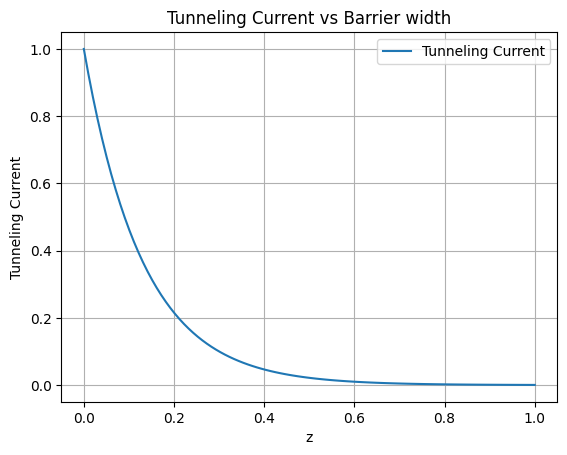

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

# Using parameters
I0 = 1.0  # Adjust as needed
m = 9.11e-31  # Electron mass
phi = 4.5  # Work function
V = 1.0  # Applied voltage
# z0 = 0.1  # Initial tip-sample separation

k = np.exp(-2 * np.sqrt(2 * m * (phi - V)) / 6.58e-16)
print (k)

# Calculate the varying tip-sample separation (distance) from the surface profile
d = np.linspace(0, 1, 100)
tunneling_current = I0 * np.exp(-2 * np.sqrt(2 * m * (phi - V)) * d / 6.5821e-16) # redused Planck constant in 6.5821e-16 eV*s or 1.054e-34 J*s


# Plot the results
plt.plot(d, tunneling_current, label='Tunneling Current')
plt.xlabel('z')
plt.ylabel('Tunneling Current')
plt.title('Tunneling Current vs Barrier width')
plt.legend()
plt.grid(True)
plt.show()

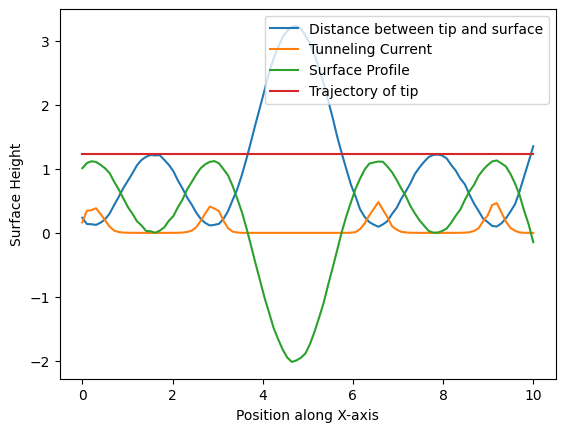

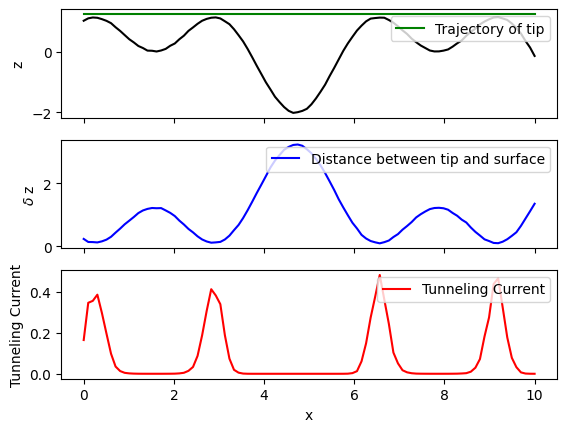

In [117]:
"""
    Using analitical solutions to find the tunnel current through a one-dimensional potential barrier :

    - dependence of the tunnel current on the distance between the tip and the surface of the sample (Fig.1b);
    - dependence of the posution z of the tip ander the surface at tunneling current and distance const (Fig.1a)  

"""
# Surface profile function
def surface_profile(x):
    return np.sin(x) + np.cos(2 * x) + 0.01 * np.random.normal(size=len(x))


x_values = np.linspace(0, 10, 100)

profile = np.sin(x_values) + np.cos(2 * x_values) + 0.01 * np.random.normal(size=len(x_values))
z0 = np.max(profile) + 0.1 # distance between the tip and sample's surface
z_values = z0 - surface_profile(x_values) 

# Calculate tunneling current at each position x
tunneling_current_surface = I0 * np.exp(-2 * np.sqrt(2 * m * (phi - V)) * z_values / 6.58e-16) #6.58e-16eV 1.054e-34


# Plot the surface profile
plt.plot(x_values, z_values, label='Distance between tip and surface')
plt.plot(x_values, tunneling_current_surface, label='Tunneling Current')

plt.plot(x_values, profile, label='Surface Profile')
plt.plot(x_values, z0 * np.ones_like(x_values), label='Trajectory of tip')  # Plotting z0(x)

plt.xlabel('Position along X-axis')
plt.ylabel('Surface Height')
# plt.title('Non-Periodic Surface Profile')
plt.legend()
# plt.grid(True)
plt.show()




# Create a figure with two subplots stacked vertically
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True)


# Plot: Distance between tip and surface
ax0.plot(x_values, profile, color='black') #label='Distance between tip and surface',
ax0.plot(x_values, z0 * np.ones_like(x_values), label='Trajectory of tip', color='green' )  # Plotting z0(x)

ax0.set_ylabel('z')
ax0.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Plot: Distance between tip and surface
ax1.plot(x_values, z_values, label='Distance between tip and surface', color='blue') #
ax1.set_ylabel('$\delta$ z')
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Plot the results for power-law relationship on the second subplot
ax2.plot(x_values, tunneling_current_surface, label='Tunneling Current', color='red')
ax2.set_xlabel('x')
ax2.set_ylabel('Tunneling Current')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))


# plt.suptitle('Tunneling Current vs Tip-Sample Separation')
plt.show()

### Bibliography

[1] G. Binnig, H. Rohrer, Scanning tunneling microscopy, Physica B+C, Volume 127, Issues 1–3, 1984, P.37-45. https://doi.org/10.1016/S0378-4363(84)80008-X.
[2] S. Lounis, Theory of Scanning Tunneling Microscopy, arXiv:1404.0961, 2014. https://doi.org/10.48550/arXiv.1404.0961.
